# Solving XOR with yadll!

In [30]:
from src.scalar.nn import * 
from src.scalar.loss import *
from src.scalar.optimizer import *
import matplotlib.pyplot as plt

In [31]:
data = np.array([
    [0,0,0],
    [1,1,0],
    [0,1,1],
    [1,0,1]
])

In [32]:
X = data[:,:-1]
labels = data[:,-1]

## Visualizing the data

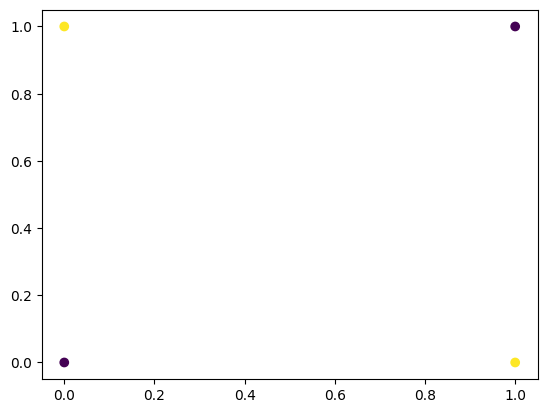

In [33]:
plt.scatter(X[:,0], X[:,1], c = labels)

## Training the model

Please note that the model sometimes converge into a local suboptimal optima. It's maybe due to the fact that vanilla SGD is used.

In [34]:
model = Sequential(
    Layer(2,2),
    Layer(2,2, activation_func = 'relu'),
    Layer(2,1)
)
optim = SGD(model.parameters(), 0.01)
print(len(model.parameters()))

15


In [35]:
losses = []
N = 5000
for k in range(N):
    ypred = [model(x)[0] for x in X]
    loss = MSE(ypred, labels)
    optim.zero_grad()
    loss.backward()
    optim.step()
    losses.append(loss.data)
    if k % 1000 == 0:
        print(f"iteration {k}, loss: {loss.data}")

iteration 0, loss: 0.7714302757105913
iteration 1000, loss: 0.009200334309793898
iteration 2000, loss: 0.0002213024243180612
iteration 3000, loss: 5.258251596547509e-06
iteration 4000, loss: 1.312146772329816e-07


## Visualizing the decision region

(-1.0, 1.75)

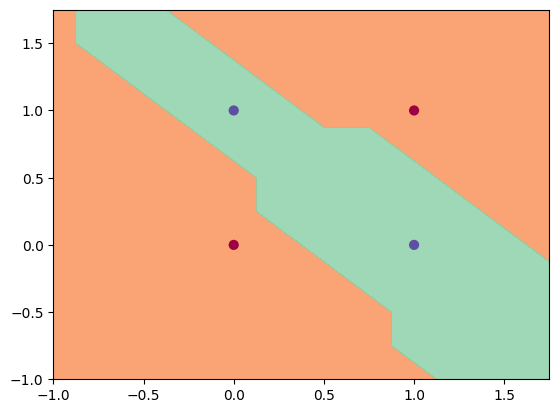

In [41]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Scalar, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s[0].data > 0.5 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())